In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils, probeReadWrite
from pyCascade.probeReadWrite import read_probes_file_switch
from filloutVentilationStats import *
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import matplotlib.ticker as ticker
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from cycler import cycler
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import statsmodels.api as sm
import warnings

plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

## Runs

In [2]:


multiRun_dir = f"{home_dir}/CHARLES/multiRuns/"
plotFolder = f"{multiRun_dir}"

## Read in results

In [3]:
overWrite = False
if os.path.exists(f"{multiRun_dir}/roomVentilationMI.csv") == False or os.path.exists(f"{multiRun_dir}/flowStatsMI.csv") == False or overWrite:

    runs = {
        253: {'A': 45, 'WS': 2, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        254: {'A': 45, 'WS': 4, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        255: {'A': 0,  'WS': 2, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        256: {'A': 0,  'WS': 4, 'C': 2, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        321: {'A': 45, 'WS': 2, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        322: {'A': 45, 'WS': 4, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        323: {'A': 0,  'WS': 2, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
        324: {'A': 0,  'WS': 4, 'C': 3, 'starts': [40000, 120000, 160000], 'stops': [120000, 160000, 240000], 'delT': [0, 5, 5], 'SS': [True, False, True]},
    }

    flowStatsMI, roomVentilationMI = readRunStats(runs, home_dir, scratch_dir, multiRun_dir = plotFolder)
else:
    flowStatsMI = pd.read_csv(f"{multiRun_dir}/flowStatsMI.csv", index_col = [0,1])
    roomVentilationMI = pd.read_csv(f"{multiRun_dir}/roomVentilationMI.csv", index_col = [0,1])

## Probed Wind Speeds

In [4]:
windSpeeds = {}

for C in roomVentilationMI["C"].unique():
    windSpeeds[C] = {}
    for WS in roomVentilationMI["WS"].unique():
        windSpeeds[C][WS] = {}
        for A in roomVentilationMI["A"].unique():
            windSpeeds[C][WS][A] = {}
            speeds = roomVentilationMI[(roomVentilationMI["WS"] == WS) & (roomVentilationMI["C"] == C) & (roomVentilationMI["A"] == A)]
            speeds = speeds["EPR_mag"]
            windSpeeds[C][WS][A]["mean"] = np.mean(speeds)

display(windSpeeds)

{2: {2: {45: {'mean': 1.8878208317392502}, 0: {'mean': 1.6702010601770694}},
  4: {45: {'mean': 3.515065342079002}, 0: {'mean': 3.3179161986474264}}},
 3: {2: {45: {'mean': 1.7781324211807998}, 0: {'mean': 2.0220284776644237}},
  4: {45: {'mean': 3.766109938513507}, 0: {'mean': 3.918731848245562}}}}

# Violins


## Wall Convection Violins

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `pal

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `pal

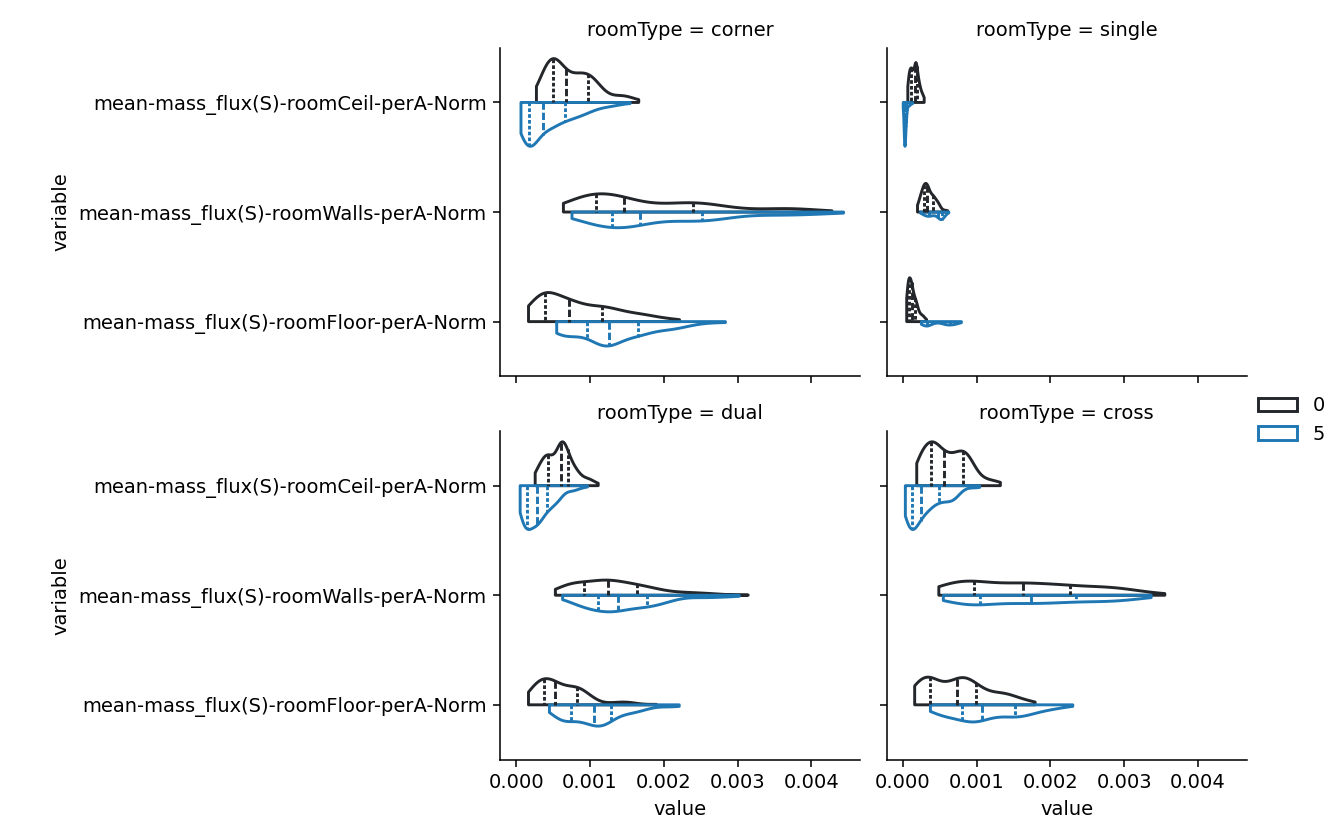

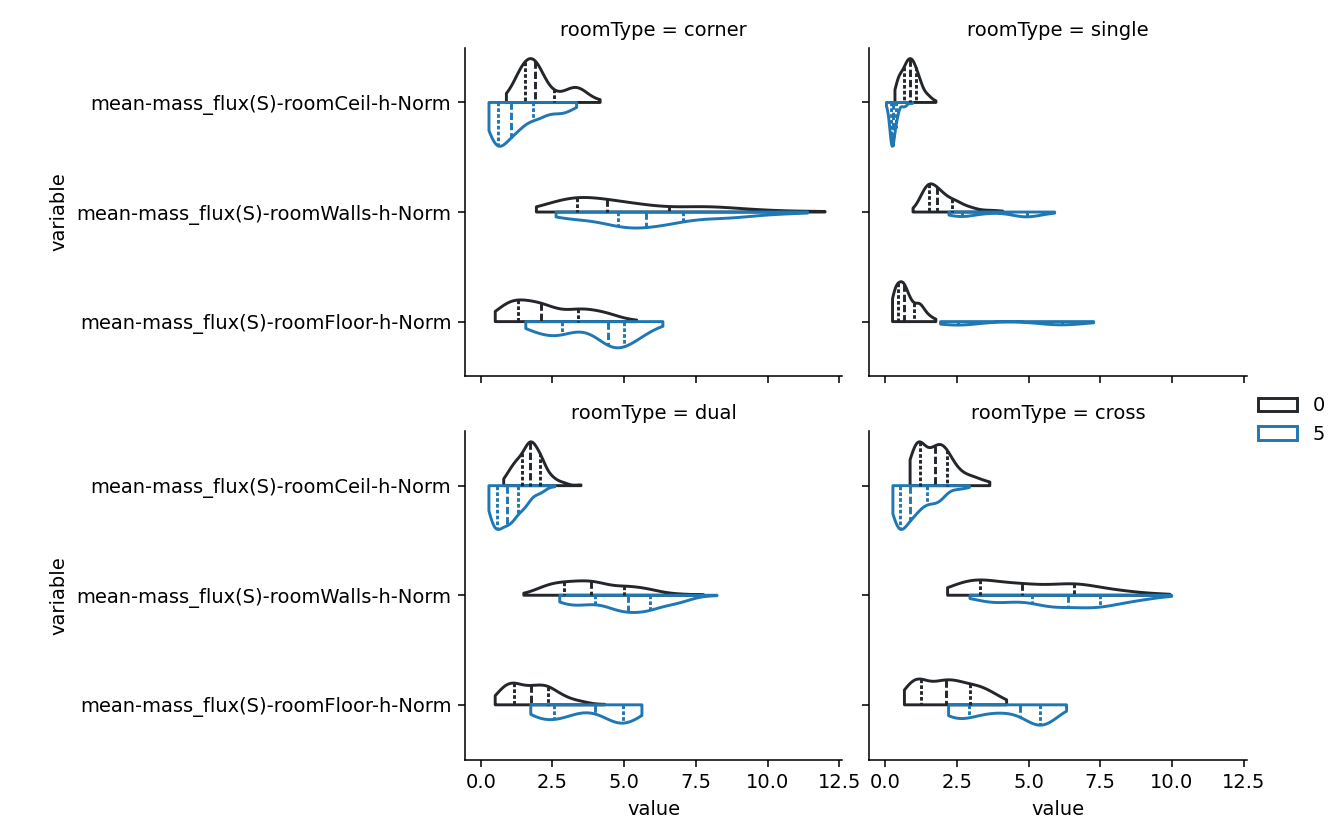

In [5]:
value_vars = ["mean-mass_flux(S)-roomCeil-perA-Norm", "mean-mass_flux(S)-roomWalls-perA-Norm", "mean-mass_flux(S)-roomFloor-perA-Norm"]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)
plotdf["value"]

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.5, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()


value_vars = ["mean-mass_flux(S)-roomCeil-h-Norm", "mean-mass_flux(S)-roomWalls-h-Norm", "mean-mass_flux(S)-roomFloor-h-Norm"]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)
plotdf["value"]

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.5, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()


## Volume Violins

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `pal

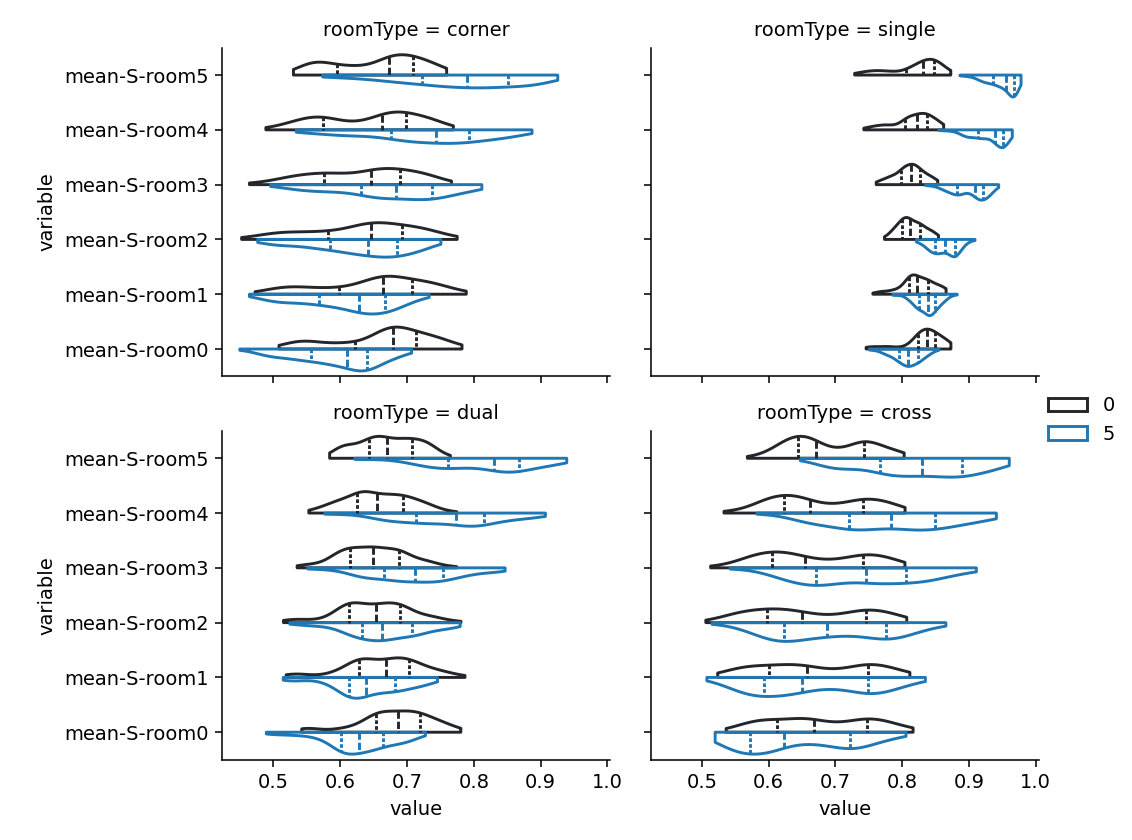

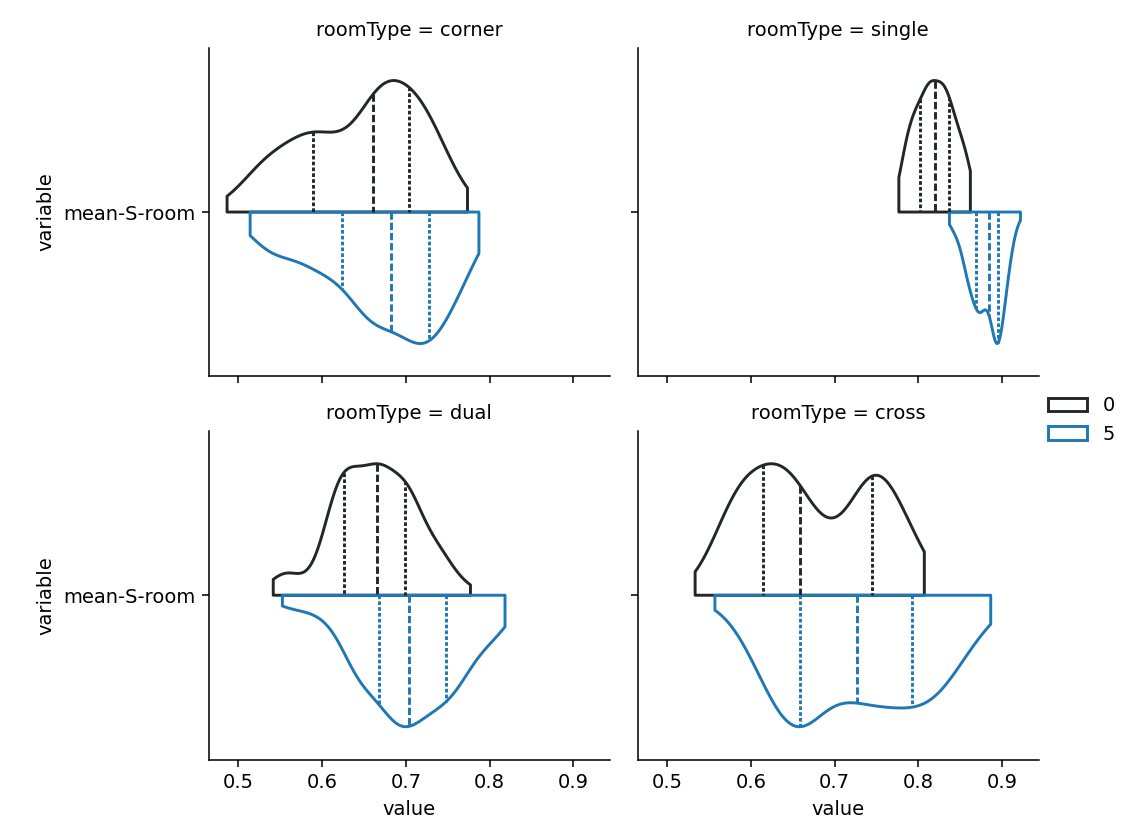

In [6]:
rooms = ["room5", "room4", "room3", "room2", "room1", "room0"]
value_vars = [f"mean-S-{r}" for r in rooms]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)
# plotdf["value"]

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()

value_vars = [f"mean-S-room"]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)
# plotdf["value"]

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()


### Temperature-Tracer Comparison/Check

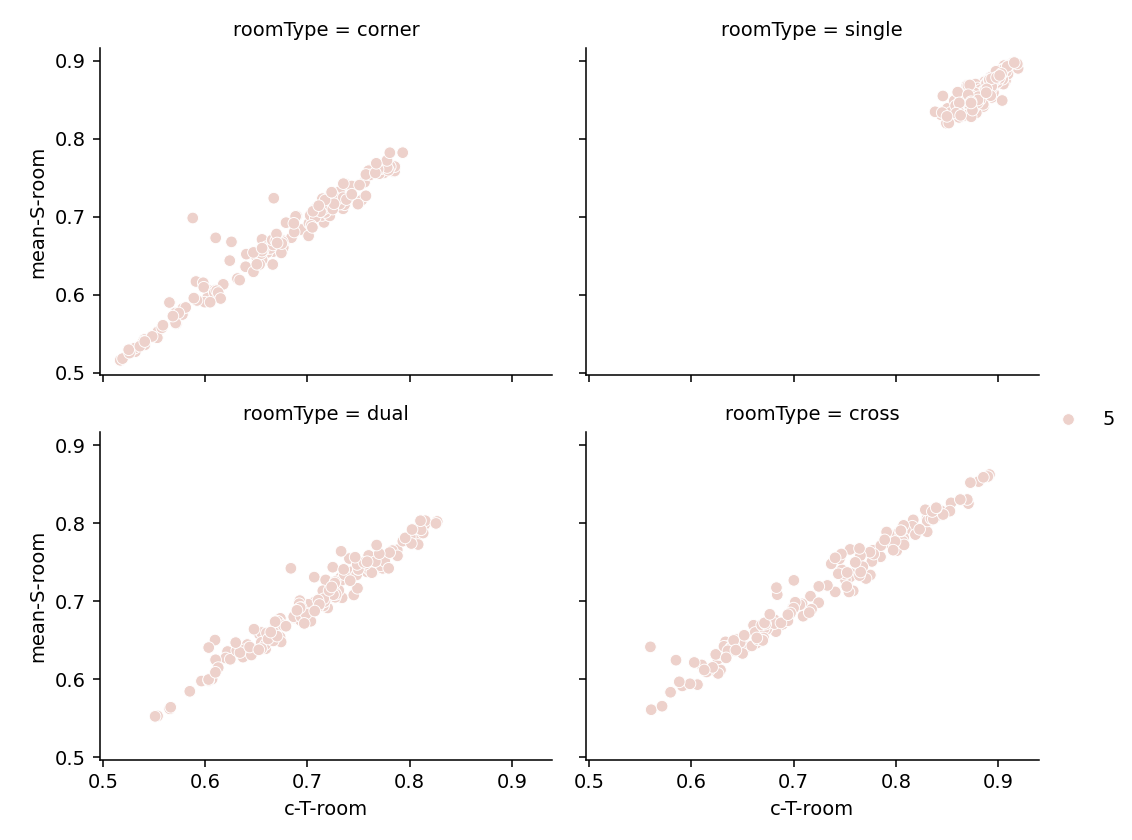

In [7]:
plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == False]

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.scatterplot, "c-T-room", "mean-S-room", "delT", hue_order = [0, 5])
g.add_legend()


## Tracer Decay Violins

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `pal

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `pal

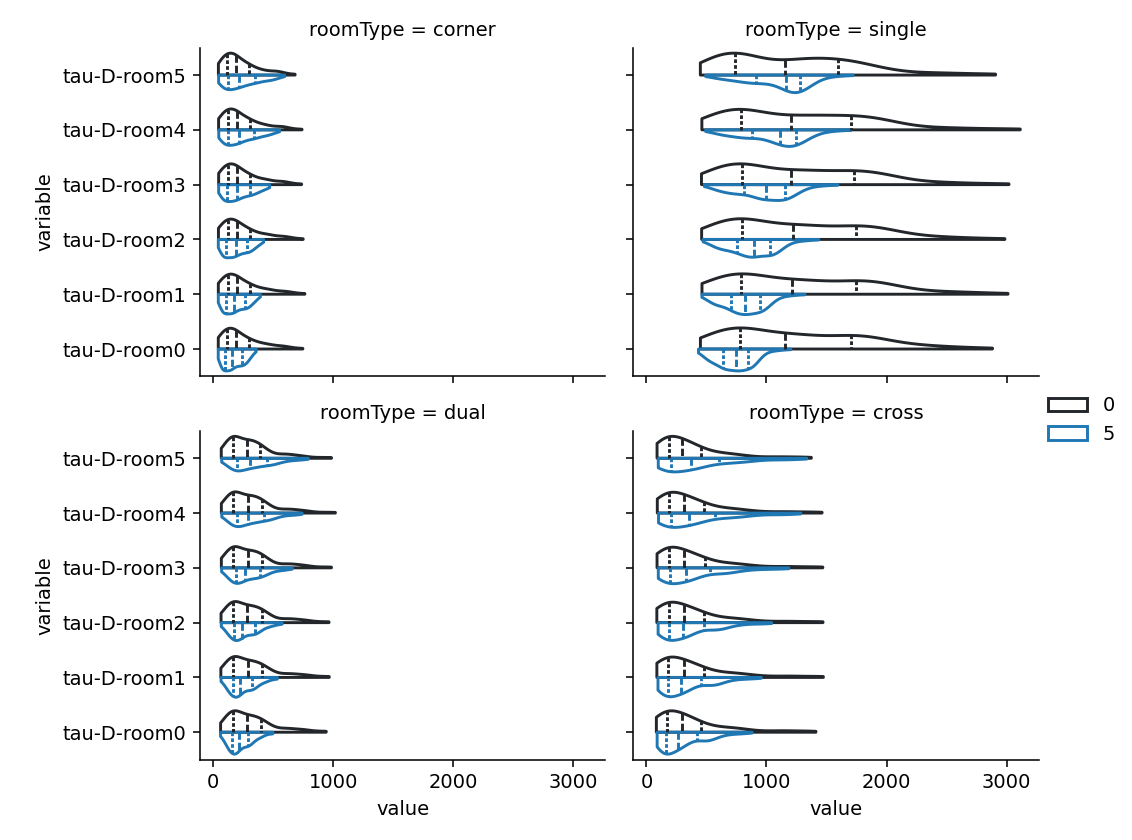

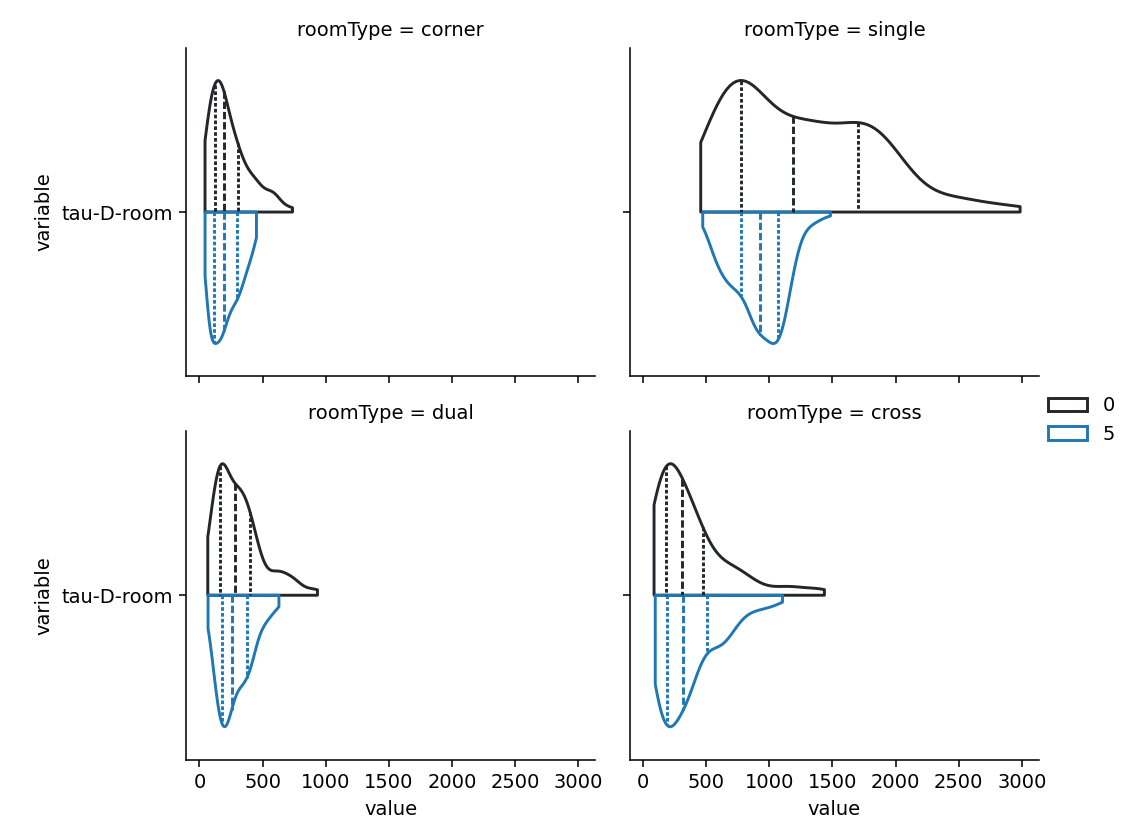

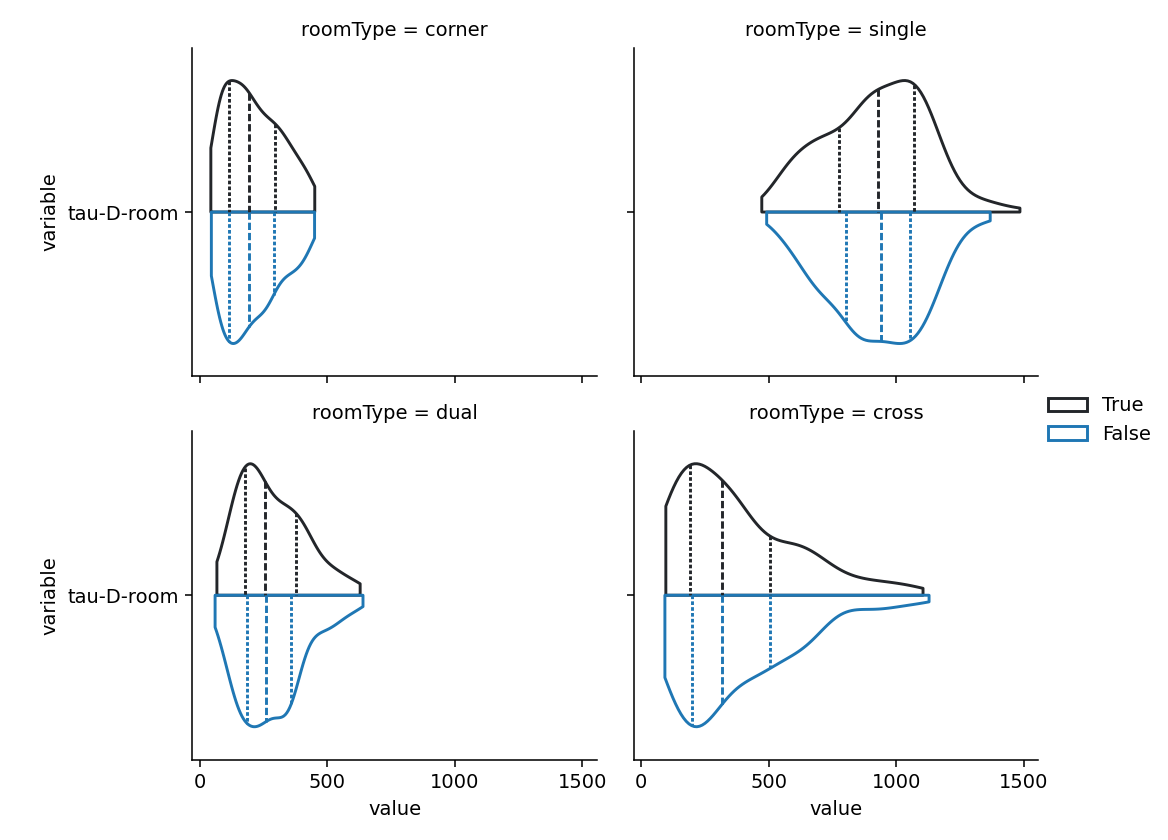

In [8]:

value_vars = [f"tau-D-{r}" for r in rooms]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()

value_vars = [f"tau-D-room"]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()

value_vars = [f"tau-D-room"]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["delT"] == 5]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "SS", order = value_vars, hue_order = [True, False], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()

/tmp/ipykernel_31891/1709491350.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_31891/1709491350.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_31891/1709491350.py:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_31891/1709491350.py:10: Perform

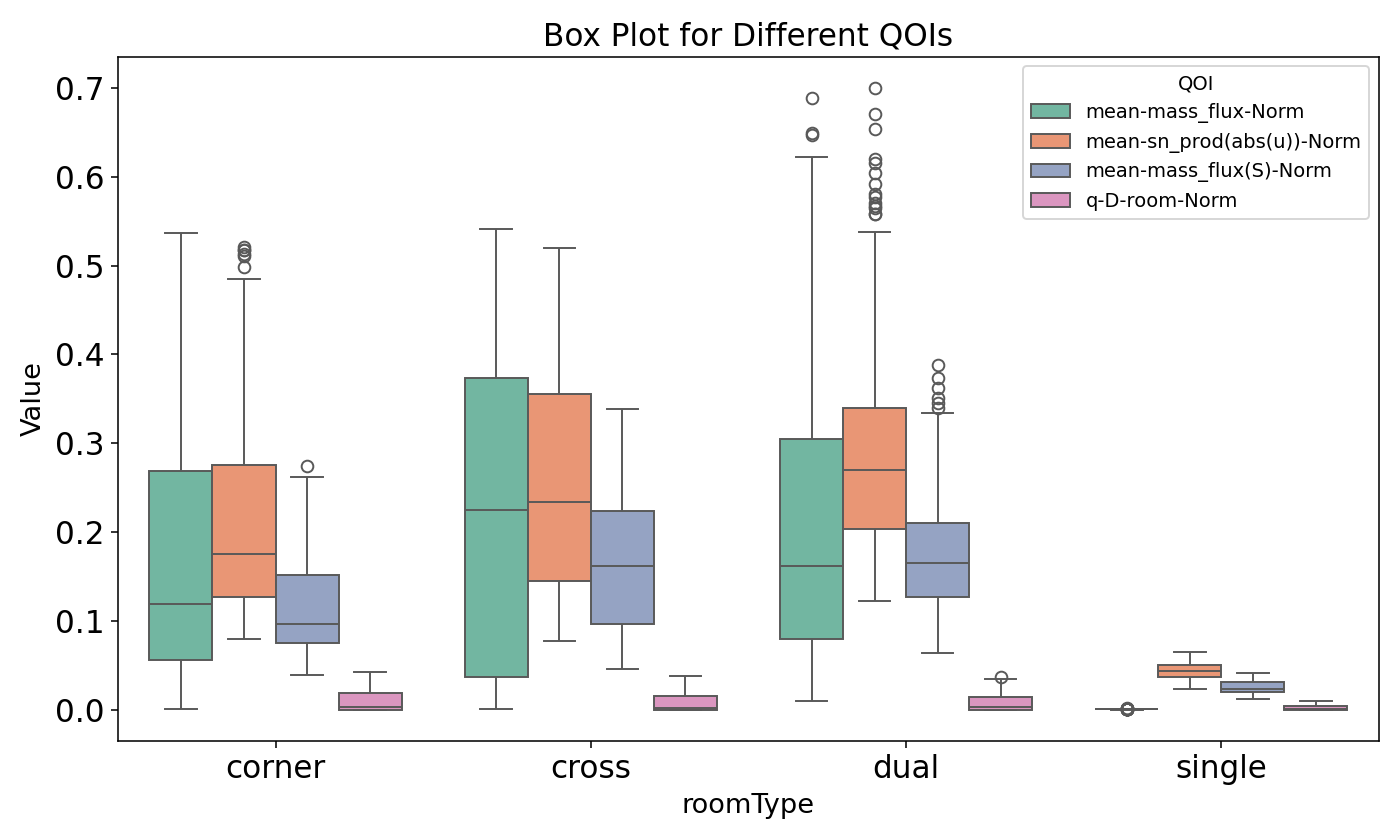

In [9]:
plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
plotdf["mean-mass_flux(S)-Norm"] =  -plotdf["mean-mass_flux(S)-Norm"]
plotdf[ "mean-sn_prod(abs(u))-Norm"] = rho*plotdf[ "mean-sn_prod(abs(u))-Norm"]

qois = ["mean-mass_flux-Norm", "mean-sn_prod(abs(u))-Norm", "mean-mass_flux(S)-Norm", "q-D-room-Norm"]

group = ["roomType", "WS", "Ri", "delT", "houseType", "C", "AofA"]

plotdfGrouped = plotdf.groupby(group, as_index=False).mean(numeric_only=True)

x_var = "roomType"
plt.figure(figsize=(10, 6))

# Create a new column to identify each QOI
plotdfMelted = plotdfGrouped.melt(id_vars=[x_var], value_vars=qois, var_name="QOI", value_name="Value")

# Create the box plot with QOI as hue
sns.boxplot(data=plotdfMelted, x=x_var, y="Value", hue="QOI", palette="Set2")

# Customize the plot
plt.legend(title="QOI", loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel(x_var, fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.title("Box Plot for Different QOIs", fontsize=16)
plt.tight_layout()

## Decay Heat Flux Violins

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `pal

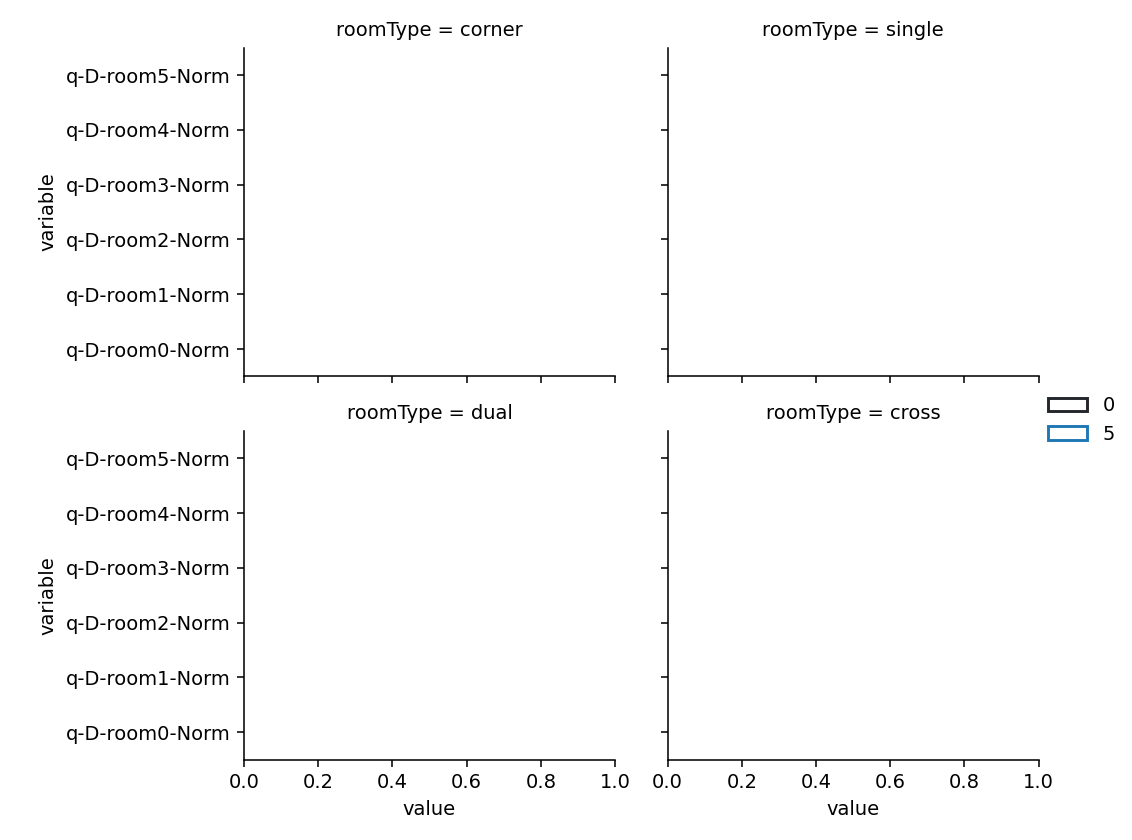

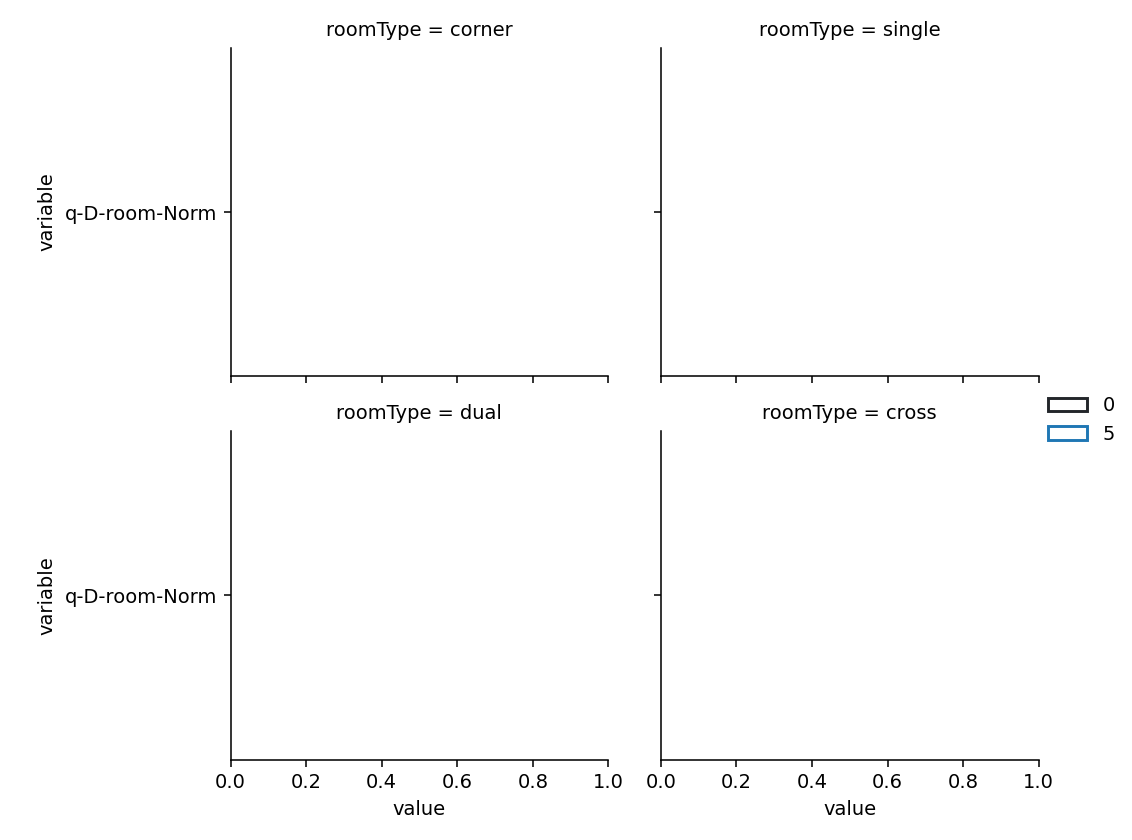

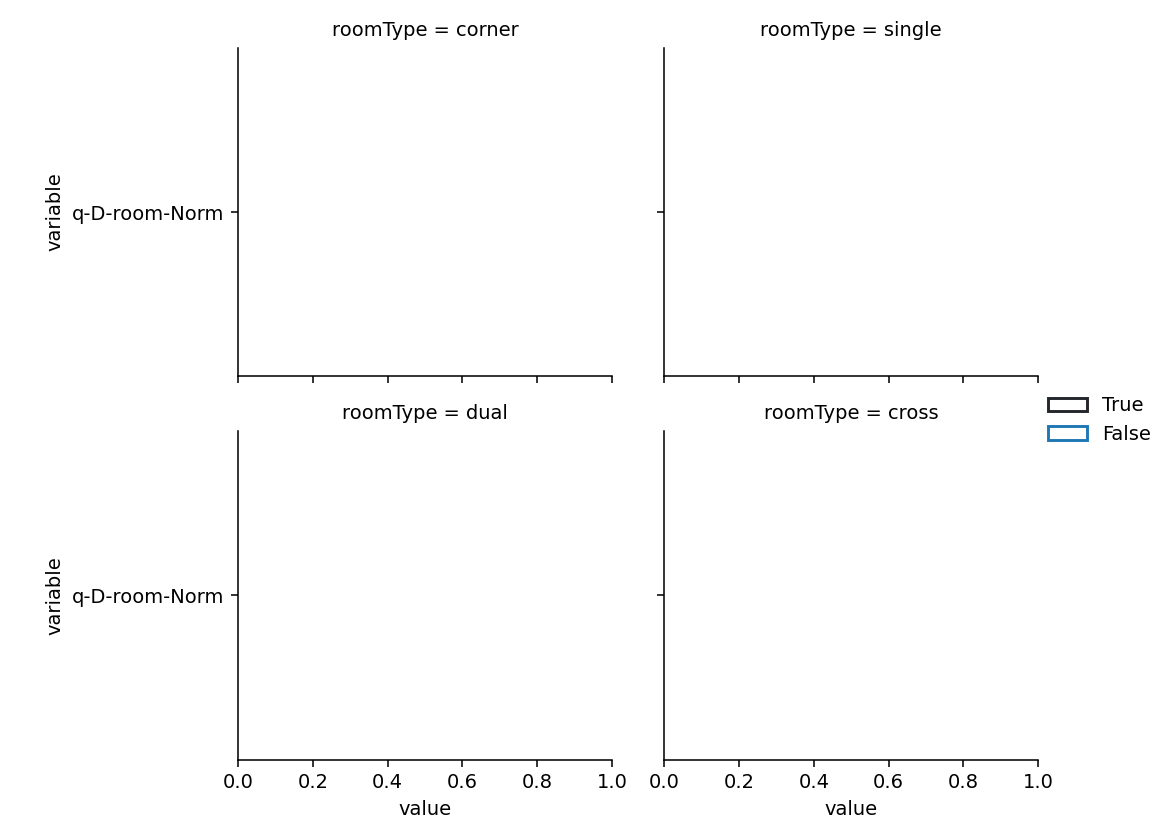

In [9]:

value_vars = [f"q-D-{r}-Norm" for r in rooms]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()

value_vars = [f"q-D-room-Norm"]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["SS"] == True]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "delT", order = value_vars, hue_order = [0, 5], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["delT"] == 5]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "SS", order = value_vars, hue_order = [True, False], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()

## Mass Flux Violins

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `pal

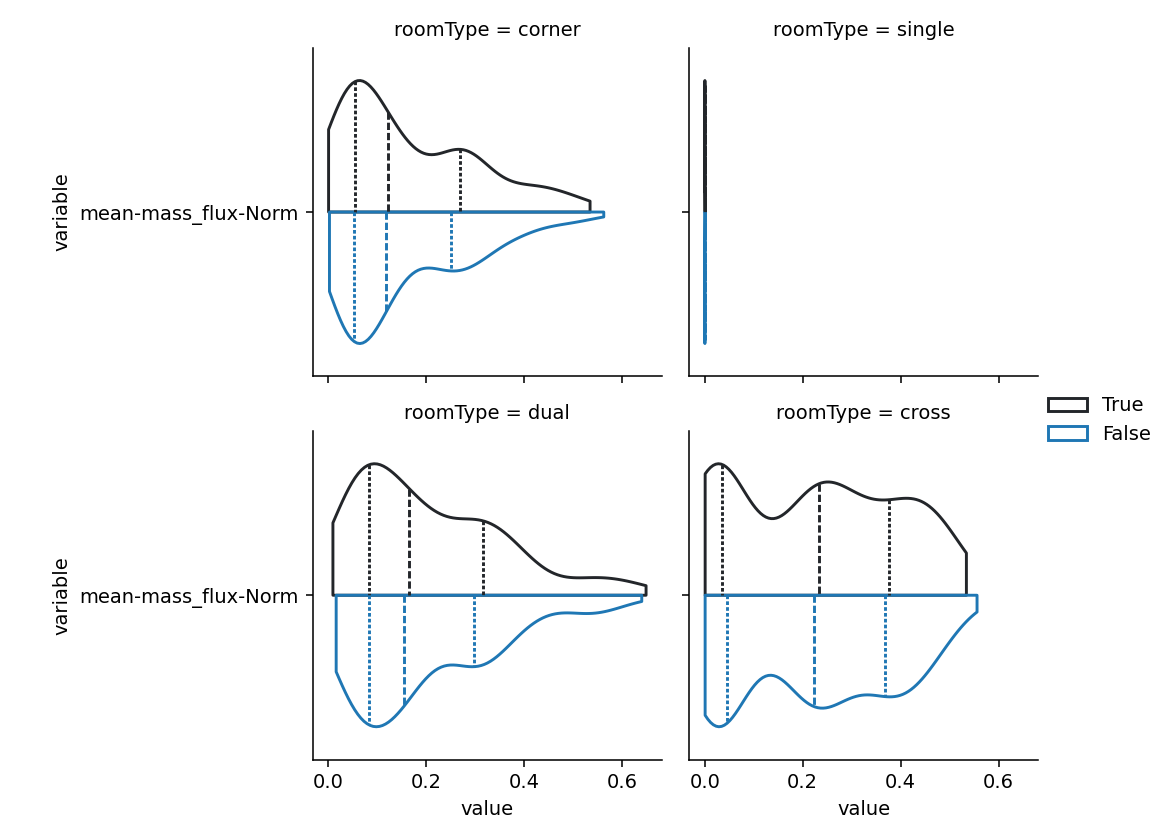

In [10]:
value_vars = [f"mean-mass_flux-Norm"]

plotdf = roomVentilationMI[roomVentilationMI["houseType"] != "sl"]
plotdf = plotdf[plotdf["delT"] == 5]
id_vars = [ c for c in plotdf.columns.values if '-' not in c]
plotdf = pd.melt(plotdf, id_vars=id_vars, value_vars = value_vars)

g = sns.FacetGrid(plotdf, col = "roomType", col_wrap = 2, col_order = ["corner", "single", "dual", "cross"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "value", "variable", "SS", order = value_vars, hue_order = [True, False], fill = False, inner = "quart", split = True, cut = 0)
g.add_legend()